## Predicting New York real estate prices using crime statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

The New York housing market is vibrant and attracts many investors across the world. 
Recently, with the change in market sentiment and the fluctiation in real estate prices, there is a need to be able 
to predict the value of a property as well as the predict its future value. Real estate agencies, buisnesses and all new yorkers looking to buy a home care about the price of real estate in NYC for various reason.
While there are many factors that affect the price of reaiestate, I propose to focus an initial
investigation on NYC real estate by exploring crime statistics. An initial hypothesis might be, real estate prices are lower in areas of higher crime.  Can we use crime data, in particular trends in crime data across the city to predict the demand for real estate in a particular location?

I will begin the exploration by analyzing trends across Boroughs while normalzing for population size across the boroughs. Next, I plan to look at intra-Borough trends after gathering futher data. Since correlation does not imply causation, we will ultimately examine other factors that wlll affect real estate prices and try to analyze how much of a role crime plays in predicting real estate prices.

This initial analysis uses data comprises real estate sales in NYC across the different boroughs. A second dataset is used comprising crime statistics in NYC. Both datasets were sourced from Kaggle.




In [2]:
def convert_to_float(mylist):
    float_list = []
    for item in mylist:
        if item.isdigit():
            item = float(item)
            float_list.append(item)
        #else:
        #    float_list.append(np.nan)
    return float_list

In [3]:
nyc_sales = pd.read_csv('nyc-rolling-sales.csv')
nyc_crimes = pd.read_csv('crimes-new-york-city/NYPD_Complaint_Data_Historic.csv')
nyc_popul = pd.read_csv('crimes-new-york-city/Population_by_Borough_NYC.csv')


/Users/trevorrhone/tf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Compare avg prices in boroughs with crime rate

# get average borough sales:
#
print(nyc_sales.columns)
boro_nums = np.unique(nyc_sales['BOROUGH'])
print(boro_nums)
print('Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).')
avg_boro_sales_list = []
for boro in boro_nums:
    index = nyc_sales['BOROUGH'] == boro
    boro_sales = nyc_sales['SALE PRICE'][index]
    boro_sales = convert_to_float(boro_sales)      
    avg_boro_sales = np.mean(boro_sales)
    avg_boro_sales_list.append(avg_boro_sales)
print(avg_boro_sales_list)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')
[1 2 3 4 5]
Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
[3337951.2707943763, 590193.64349553129, 834488.37177194655, 739908.61591020005, 543472.11029778735]


Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')


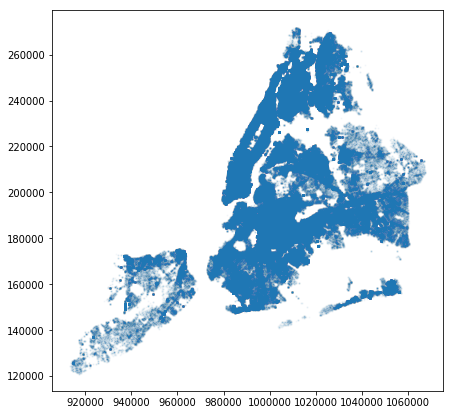

In [5]:
print(nyc_crimes.columns)
x = nyc_crimes['X_COORD_CD']
y = nyc_crimes['Y_COORD_CD']

plt.figure(figsize=(7,7))
plt.scatter(x,y,s=1,alpha=0.03)
plt.show()

In [6]:
# separate by seriousness of crime:

nyc_felony = nyc_crimes[nyc_crimes['LAW_CAT_CD'] == 'FELONY']
nyc_misdem = nyc_crimes[nyc_crimes['LAW_CAT_CD'] == 'MISDEMEANOR']
nyc_violation = nyc_crimes[nyc_crimes['LAW_CAT_CD'] == 'VIOLATION']


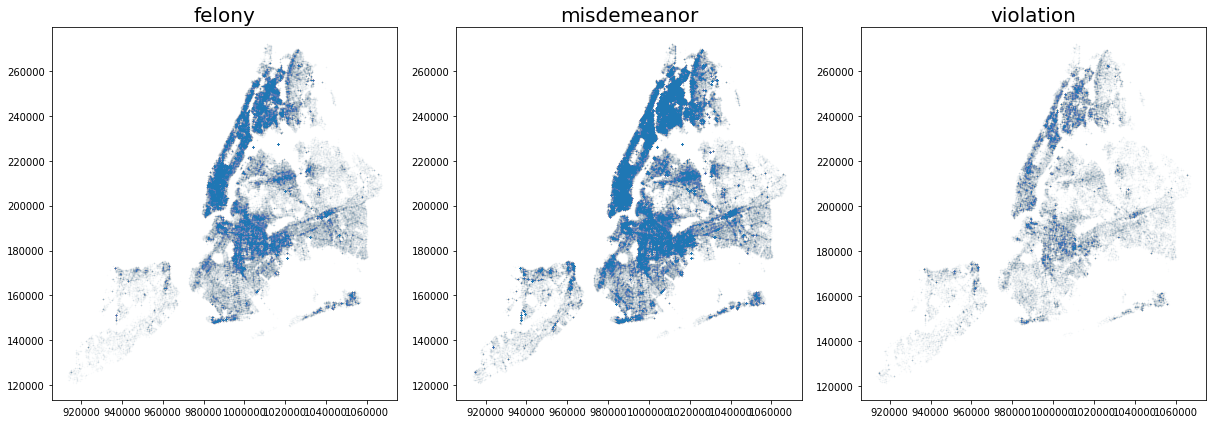

In [222]:
plt.figure(figsize=(17,6))

plt.subplot(1,3,1)
x = nyc_felony['X_COORD_CD']
y = nyc_felony['Y_COORD_CD']
# plt.figure(figsize=(7,7))
plt.title('felony',fontsize=20)
plt.scatter(x,y,s=0.1,alpha=0.03)


plt.subplot(1,3,2)
x = nyc_misdem['X_COORD_CD']
y = nyc_misdem['Y_COORD_CD']
plt.title('misdemeanor',fontsize=20)
# plt.figure(figsize=(7,7))
plt.scatter(x,y,s=0.1,alpha=0.03)

plt.subplot(1,3,3)
x = nyc_violation['X_COORD_CD']
y = nyc_violation['Y_COORD_CD']
# plt.figure(figsize=(7,7))
plt.title('violation',fontsize=20)
plt.scatter(x,y,s=0.1,alpha=0.03)
plt.tight_layout()
plt.show()


### CRIME RATE by borough.. Number of crimes versus population:

In [8]:
nyc_popul[['Borough','2010 - Boro share of NYC total', '2010']]

,Borough,2010 - Boro share of NYC total,2010
0,NYC Total,100%,"8,242,624"
1,Bronx,16.8%,"1,385,108"
2,Brooklyn,30.97%,"2,552,911"
3,Manhattan,19.24%,"1,585,873"
4,Queens,27.3%,"2,250,002"
5,Staten Island,5.69%,"468,730"


In [9]:
bronx_pop = float((nyc_popul['2010'][1]).replace(',',''))
brooklyn_pop = nyc_popul['2010'][2]
brooklyn_pop = float(brooklyn_pop.replace(',',''))
manhattan_pop = nyc_popul['2010'][3]
manhattan_pop = float(manhattan_pop.replace(',',''))
queens_pop = nyc_popul['2010'][4]
queens_pop = float(queens_pop.replace(',',''))
staten_pop = nyc_popul['2010'][5]
staten_pop = float(staten_pop.replace(',',''))
print((bronx_pop))

1385108.0


In [10]:
bronx_crime = nyc_crimes[nyc_crimes['BORO_NM'] == 'BRONX']
brooklyn_crime = nyc_crimes[nyc_crimes['BORO_NM'] == 'BROOKLYN']
manhattan_crime = nyc_crimes[nyc_crimes['BORO_NM'] == 'MANHATTAN']
queens_crime = nyc_crimes[nyc_crimes['BORO_NM'] == 'QUEENS']
staten_crime = nyc_crimes[nyc_crimes['BORO_NM'] == 'STATEN ISLAND']
        

In [11]:
num_bronx_crimes = len(bronx_crime)
num_brooklyn_crimes = len(brooklyn_crime) 
num_manhattan_crimes = len(manhattan_crime)
num_queens_crimes = len(queens_crime) 
num_staten_crimes = len(staten_crime )

rate_bronx_crimes = len(bronx_crime)/bronx_pop*1.0
rate_brooklyn_crimes = len(brooklyn_crime)/brooklyn_pop*1.0 
rate_manhattan_crimes = len(manhattan_crime)/manhattan_pop*1.0
rate_queens_crimes = len(queens_crime)/queens_pop*1.0 
rate_staten_crimes = len(staten_crime )/staten_pop*1.0

In [152]:
print('Borough Sales defn: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).')

borough_crimes = [rate_manhattan_crimes,rate_bronx_crimes,rate_brooklyn_crimes,rate_queens_crimes,rate_staten_crimes]

Borough Sales defn: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).


In [13]:
print('borough_crimes ', borough_crimes)
print('avg_boro_sales_list ',avg_boro_sales_list)

borough_crimes  [0.15433076923561975, 0.16423051487681828, 0.1236423831461418, 0.09420347181913616, 0.10398950355215156]
avg_boro_sales_list  [3337951.2707943763, 590193.64349553129, 834488.37177194655, 739908.61591020005, 543472.11029778735]


Text(0,0.5,'sales price')

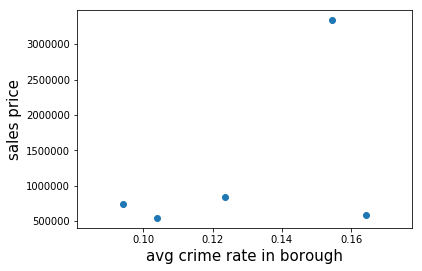

In [14]:
plt.scatter(borough_crimes, avg_boro_sales_list)
plt.xlabel('avg crime rate in borough',fontsize=15)
plt.ylabel('sales price',fontsize=15)

### Real estate sales estimate
Consider:
* without crime
* with crime stats
* compare using p-values

In [15]:
print(nyc_sales.columns)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


In [80]:
nyc_sales = pd.read_csv('nyc-rolling-sales.csv')
#scrub prices that are not real sale... price < 1000)
sales_price = pd.to_numeric(nyc_sales['SALE PRICE'], errors = 'coerce')
nyc_sales = nyc_sales[sales_price > 10000]
nyc_sales_nna = nyc_sales.dropna(axis=1).copy()
Sales_info = nyc_sales_nna[['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'BLOCK', 'LOT', 
       'BUILDING CLASS AT PRESENT', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'BUILDING CLASS AT TIME OF SALE']]

print(Sales_info.shape)
Sales_info = Sales_info.dropna(axis=1)

# print(nyc_sales_nna.shape)
# nyc_sales_nna = nyc_sales_nna[exists_index]
# print(nyc_sales_nna.shape)
Sales_info = nyc_sales_nna[['ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS','SALE PRICE',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT']]
Sales_info['LAND SQUARE FEET'] = pd.to_numeric(Sales_info['LAND SQUARE FEET'], errors='coerce')
Sales_info['GROSS SQUARE FEET'] = pd.to_numeric(Sales_info['GROSS SQUARE FEET'], errors='coerce')
Sales_info['SALE PRICE'] = pd.to_numeric(Sales_info['SALE PRICE'], errors='coerce')

#Sales_info_cat = nyc_sales_nna[['BOROUGH','NEIGHBORHOOD']] #,'BUILDING CLASS CATEGORY','BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE']]
Sales_info_cat = nyc_sales_nna['BOROUGH']

Sales_info_dum = pd.get_dummies(Sales_info_cat[:])
Sales_info_combine = pd.concat((Sales_info, Sales_info_dum),axis=1)

print('before', Sales_info_combine.shape)
Sales_info_combine = Sales_info_combine.dropna(axis=0)
print('after', Sales_info_combine.shape)

Sales = Sales_info_combine['SALE PRICE'] 
# exists_index = [x.isdigit() for x in Sales]

X = Sales_info_combine.copy()
# print(X.columns)
X = X.drop(columns='SALE PRICE')
Y = Sales.copy()


(58400, 14)


/Users/trevorrhone/tf/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/trevorrhone/tf/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


before (58400, 13)
after (36883, 13)


/Users/trevorrhone/tf/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


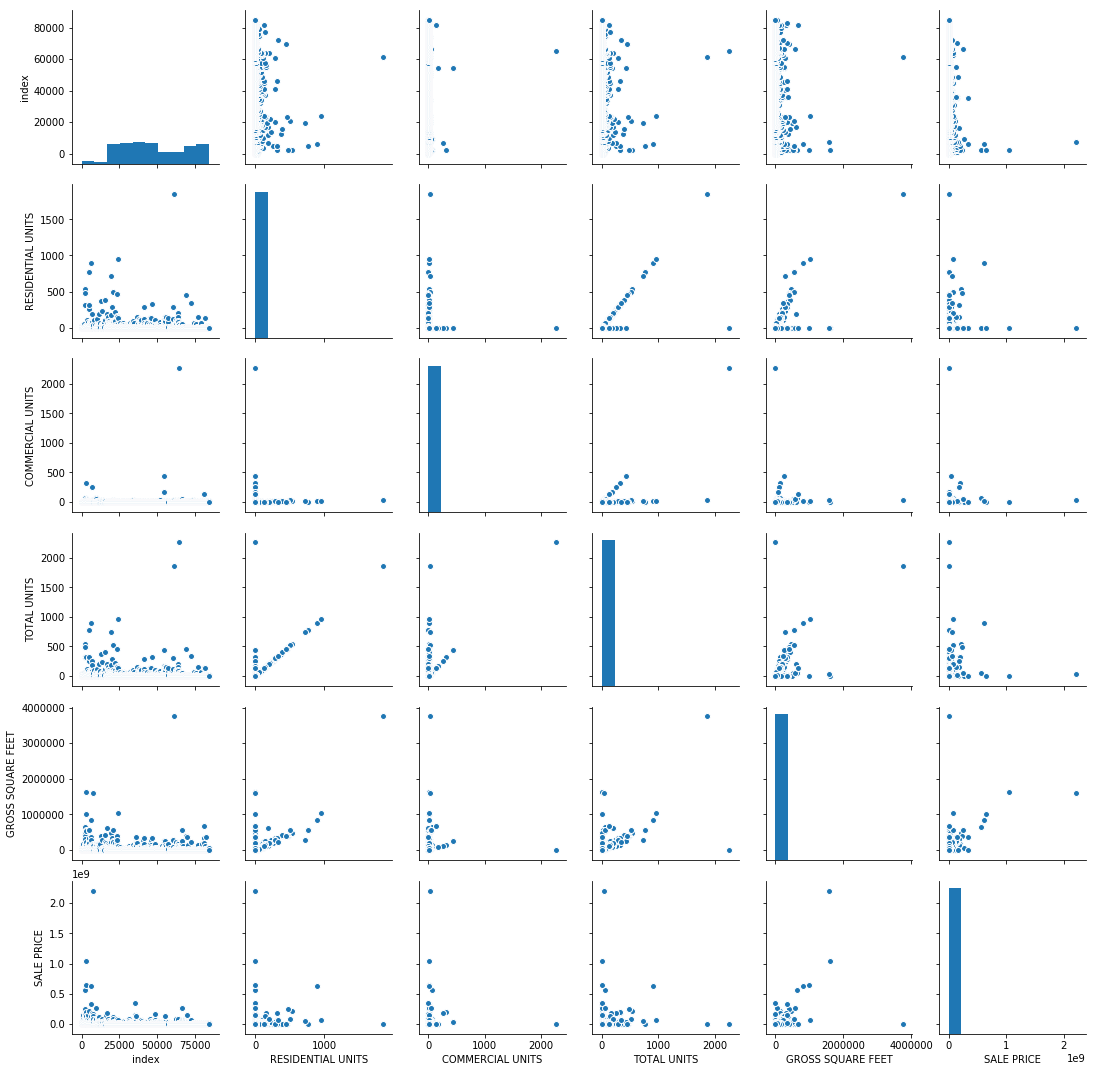

In [17]:
Xsub = X[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'GROSS SQUARE FEET']]
Xplus = pd.concat((Xsub, Y),axis=1)
Xplus = Xplus.reset_index()
# plt.scatter(Xsub['RESIDENTIAL UNITS'],Y)
sns.pairplot(Xplus)


In [81]:
X = X.reset_index()
Y = Y.reset_index()
Y = Y.drop(columns ='index')
N = len(Y)
split = 0.8
trN = int(np.floor(N*split))
print(trN)
randnum = np.random.permutation(np.arange(N))
tr_index = np.asarray(randnum[:trN])
te_index = np.asarray(randnum[trN:])
Ytrain = Y.iloc[tr_index]
Ytrain = np.ravel(Ytrain)
Xtrain = X.iloc[tr_index,:]
Ytest = Y.iloc[te_index]
Ytest = np.ravel(Ytest)
Xtest = X.iloc[te_index,:]

29506


## LASSO

In [82]:
alphas

array([  1.00000000e+02,   1.00000000e+06,   1.00000000e+10])

In [83]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [84]:
from sklearn.model_selection import cross_val_score

Take randome subsets of data to make testing go faster:

In [85]:
L = np.arange(len(Ytrain))
randsub = np.random.permutation(L)
randsub = randsub[:2000]
print(randsub)

[25587 26205 19009 ..., 16127  3713 12310]


In [86]:
Ytrain[np.asarray(randsub)]

array([315000, 669091, 900000, ..., 290000,  67451, 369000])

In [109]:
alphas = np.logspace(-2, 10, 30)
subset = 9000
scores = []
for alpha in alphas:
    lasso = linear_model.Lasso(alpha=alpha, max_iter=30000)
    xsub = Xtrain.iloc[np.asarray(randsub),:]
    ysub = Ytrain[np.asarray(randsub)]
    lasso.fit(xsub, ysub)
    #pred = clf.predict(Xtrain[:1000])
    #score = clf.score(Xtest,Ytest)
    score = cross_val_score(lasso, xsub, ysub)
    #print(score)
    scores.append(np.mean(score))
    
maxdex = np.argwhere(np.max(scores)==scores)[0][0]
bestalpha = alphas[maxdex]


/Users/trevorrhone/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevorrhone/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevorrhone/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevorrhone/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarni

/Users/trevorrhone/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevorrhone/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevorrhone/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevorrhone/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarni

In [110]:
lasso = linear_model.Lasso(alpha=bestalpha, max_iter=30000)
xsub = Xtrain.iloc[np.asarray(randsub),:]
ysub = Ytrain[np.asarray(randsub)]
lasso.fit(xsub, ysub)
pred = lasso.predict(xsub)
#score = clf.score(Xtest,Ytest)
score = cross_val_score(lasso, xsub, ysub)


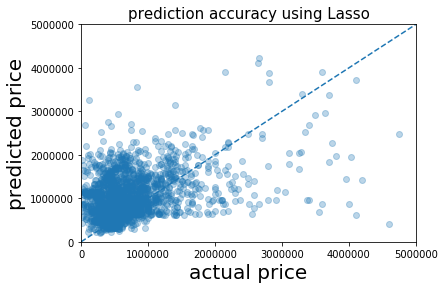

In [172]:
plt.scatter(ysub,pred,alpha=0.3)
xx = np.arange(0,1e7)
plt.plot(xx,xx,'--')
plt.xlim(0,5e6)
plt.ylim(0,5e6)
plt.xlabel('actual price',fontsize=20)
plt.ylabel('predicted price',fontsize=20)
plt.title('prediction accuracy using Lasso',fontsize=15)
plt.show()

### NOTE:
* Linear regression with constraints on coefficients does not perform well
* Consider a non-linear model (like random forests regression or extra trees regression) next

## Extra Trees Regression
* Housing data only (no crime stats)

In [113]:
from sklearn.ensemble import ExtraTreesRegressor
from tqdm import tqdm

In [114]:
def extra_fit(Xtrain,Ytrain,Xtest,Ytest,max_depth,max_features,min_samples_leaf,n_estimators):
    """
       Function packaging fitting routine for extra tree, 
       INPUT: data and hyperparameters and 
       OUTPUT: MSE, absolute-error and prediton for test data, y_erg; 
               predictino for training dta yt_erf,  absolute-error
    """
    regr_erf = ExtraTreesRegressor(n_estimators=n_estimators, criterion='mse', max_depth=max_depth, 
                                   min_samples_split=2, 
                                   min_samples_leaf=min_samples_leaf, 
                                   min_weight_fraction_leaf=0.0, 
                                   max_features=max_features, 
                                   max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                   bootstrap=False, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
                                   warm_start=False)
    regr_erf.fit(Xtrain, Ytrain)
    y_erf = regr_erf.predict(Xtest)
    yt_erf = regr_erf.predict(Xtrain)
    testscore = regr_erf.score(Xtest,Ytest)
    return y_erf, yt_erf, testscore, regr_erf


In [149]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(29506, 13)
(29506,)
(7377, 13)
(7377,)


### Tune hyperparameters via grid search 
* Depth of tree
* Number of estimators

In [189]:
def extra_hyper(Xtrain, Ytrain, Xtest, Ytest):
    """ 
        search for hyperparameters 
    """
    min_samples_leaf=2
    n_jobs = -1
    max_features = 'auto' 

    depth = np.arange(1,20)*2
    estimators  = np.arange(1,20)*2
    features = np.linspace(1,100,10)

    scores = []
    sub = 5000

    for d in tqdm(depth):
        scores_list = []
        for est in estimators:
            y_erf, yt_erf, testscore, erf = extra_fit(Xtrain[:sub], Ytrain[:sub], Xtest[:sub], Ytest[:sub], d, max_features, min_samples_leaf, est)
            scores_list.append(testscore)
        scores.append(scores_list)
    scores_array = np.asarray(scores)
    return scores_array

scores_array = extra_hyper(Xtrain, Ytrain, Xtest, Ytest)

100%|██████████| 19/19 [00:49<00:00,  2.63s/it]


(19, 19)


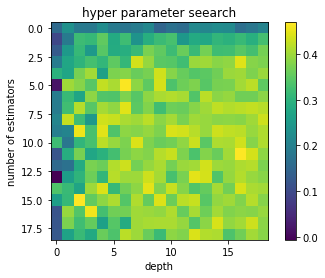

In [190]:
print(scores_array.shape)
plt.imshow(scores_array)
plt.title('hyper parameter seearch')
plt.xlabel('depth')
plt.ylabel('number of estimators')
plt.colorbar()
plt.show()

In [191]:
def find_best_hyper(scores_array):
    """ returns best hyper parameters """
    print(scores_array.shape)
    minindex = np.argwhere(scores_array.max()==scores_array)[0]
    print(minindex)
    est_min = estimators[minindex[1]]
    d_min = depth[minindex[0]]
    print('best # estimator:', est_min)
    print('best tree depth:', d_min)
    print(scores_array[minindex[0],minindex[1]])
    return est_min, d_min

est_min, d_min = find_best_hyper(scores_array)

(19, 19)
[11 16]
best # estimator: 34
best tree depth: 24
0.468775306816


In [192]:
print(Ytest.shape)

(7377,)


In [193]:
max_depth= d_min
n_estimators = est_min 
min_samples_leaf = 2
n_jobs = -1
max_features = 'auto' 

y2_erf, y2t_erf, testscores, erf = extra_fit(Xtrain,Ytrain, Xtest, Ytest,max_depth,
                                                max_features,min_samples_leaf,n_estimators)

print('R2 for the random forets is: ', testscores )
mse = np.mean( (Ytest - y2_erf)**2.0 )
print('MSE :', mse)

R2 for the random forets is:  0.562767220035
MSE : 3.34124652987e+13


In [121]:
L = np.arange(len(Ytest))
half = np.int(np.floor(len(Ytest)/2.0))
randex = np.random.permutation(L)
subdex = np.asarray(randex[:half])

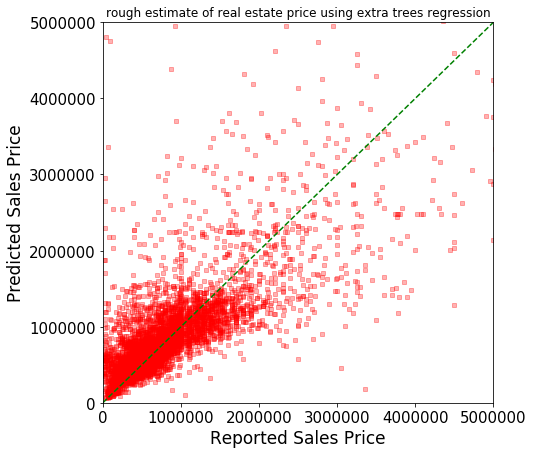

In [194]:
plt.figure()
s = 10
a = 0.40
plt.figure(figsize=(7,7))
plt.scatter(Ytest, y2_erf, c="red", s=20, marker="s", alpha=0.3, label="test")
# plt.scatter(Ytrain[subdex], y2t_erf[subdex], c="green", s=40, marker="o", alpha=a, label="training")
xline=np.linspace(-10.0,2.0e9,40)
plt.plot(xline,xline,'g--')
plt.xlim([0, 5.0e6])
plt.ylim([0, 5.0e6])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Reported Sales Price',fontsize=17)
plt.ylabel('Predicted Sales Price',fontsize=17)
#plt.legend()
plt.title('rough estimate of real estate price using extra trees regression')

plt.show()

Descriptors used to create model thus far:

In [148]:
print('Current features used : \n \n', X.columns)
print('\nWhere 1, 2, 3, 4, 5 represents the Boroughs')

Current features used : 
 
 Index([            'index',          'ZIP CODE', 'RESIDENTIAL UNITS',
        'COMMERCIAL UNITS',       'TOTAL UNITS',  'LAND SQUARE FEET',
       'GROSS SQUARE FEET',        'YEAR BUILT',                   1,
                         2,                   3,                   4,
                         5],
      dtype='object')

Where 1, 2, 3, 4, 5 represents the Boroughs


The above model excludes crime statistics to estimate real estate price. One of the next steps is to include crime statistics and measure any improvement in model performance.

We show first that we can build a model that fits our data. We perform hyperparameter tuning.  Nextsteps will use more robust hyperparameter tuning to try to improve our model. Current results are promising (no cross validation yet).

After we build our model and prove its performance we will note how it performs without crime statistics data.  Then we will include the Crime stats data nd measure any performance in the model.  We will account for the increase in the nunber of parameters.  If there is improvement in the model performace, we can claim that crime is important for determing the Sales price of real estate


# Build a model with Crime stats as input 

In [165]:
print(Sales_info_combine.columns[:])
# Sales_info_combine[1][:5]

Index([         'ZIP CODE', 'RESIDENTIAL UNITS',  'COMMERCIAL UNITS',
             'TOTAL UNITS',        'SALE PRICE',  'LAND SQUARE FEET',
       'GROSS SQUARE FEET',        'YEAR BUILT',                   1,
                         2,                   3,                   4,
                         5],
      dtype='object')


In [167]:
print('Borough Sales defn: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).')

Borough Sales defn: Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).


In [168]:
Crime_sales_info = Sales_info_combine.copy()
Crime_sales_info['manhattan_crime'] = Crime_sales_info[1].values*borough_crimes[0]
Crime_sales_info['bronx_crime'] = Crime_sales_info[2].values*borough_crimes[1]
Crime_sales_info['brooklyn_crime'] = Crime_sales_info[3].values*borough_crimes[2]
Crime_sales_info['queens_crime'] = Crime_sales_info[4].values*borough_crimes[3]
Crime_sales_info['staten_crime'] = Crime_sales_info[5].values*borough_crimes[4]

In [182]:
Xc = Crime_sales_info.copy()
Xc = Xc.drop(columns = 'SALE PRICE')
Xctrain = Xc.iloc[tr_index,:]
Xctest = Xc.iloc[te_index,:]

In [195]:
scores_array_c = extra_hyper(Xctrain, Ytrain, Xctest, Ytest)

100%|██████████| 19/19 [00:50<00:00,  2.68s/it]


(19, 19)


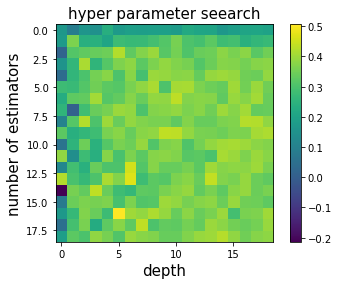

In [217]:
print(scores_array_c.shape)
plt.imshow(scores_array_c)
plt.title('hyper parameter seearch', fontsize = 15)
plt.xlabel('depth', fontsize = 15)
plt.ylabel('number of estimators', fontsize = 15)
plt.colorbar()
plt.show()

In [197]:
est_min_c, d_min_c = find_best_hyper(scores_array_c)

(19, 19)
[16  5]
best # estimator: 12
best tree depth: 34
0.506345723464


In [203]:
max_depth_c = d_min_c
n_estimators_c = est_min_c 
min_samples_leaf = 2
n_jobs = -1
max_features = 'auto' 

yc_erf, yct_erf, testscores_c, erf_c = extra_fit(Xctrain,Ytrain, Xctest, Ytest,max_depth_c,
                                                max_features,min_samples_leaf,n_estimators_c)

print('R2 for the random forets is: ', testscores_c )

mse_c = np.mean( (Ytest - yc_erf)**2.0 )
print('MSE :', mse_c)

R2 for the random forets is:  0.585166111556
MSE : 3.17007862573e+13


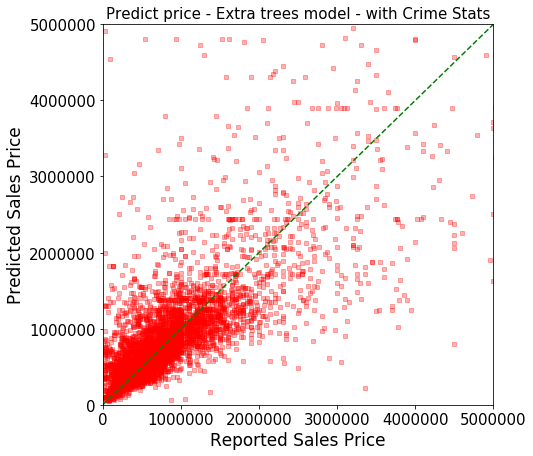

In [221]:
plt.figure()
s = 10
a = 0.40
plt.figure(figsize=(7,7))
plt.scatter(Ytest, yc_erf, c="red", s=20, marker="s", alpha=0.3, label="test")
# plt.scatter(Ytrain[subdex], y2t_erf[subdex], c="green", s=40, marker="o", alpha=a, label="training")
xline=np.linspace(-10.0,2.0e9,40)
plt.plot(xline,xline,'g--')
plt.xlim([0, 5.0e6])
plt.ylim([0, 5.0e6])

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Reported Sales Price',fontsize=17)
plt.ylabel('Predicted Sales Price',fontsize=17)
#plt.legend()
plt.title('Predict price - Extra trees model - with Crime Stats',fontsize=15)

plt.show()

In [215]:
print('R2 and MSE for fit excluding Crime States: \n')
print('R2 :  0.562767220035 \nMSE : 3.34124652987e+13')


print('\nR2 and MSE for fit including Crime States: \n')
print('R2 :  0.585166111556 \nMSE : 3.17007862573e+13')


R2 and MSE for fit excluding Crime States: 

R2 :  0.562767220035 
MSE : 3.34124652987e+13

R2 and MSE for fit including Crime States: 

R2 :  0.585166111556 
MSE : 3.17007862573e+13


## Future work: 
Eventhough the model including the Crime stats performs better in the run displayed, there is a fluctuation in the performance  from run to run.  Future work will involve characterizing the statistical fluctuation and determining the statistical significace of this difference.

Analysis thus far has been limited to inter-Borough data.  Future work will include analysis of locations within a given Borough.

We have thus far not been able to prove if crime statistics impacts real estate prices. We have only shown that it might be useful. In addition, to proving this, another big factor that could be considered is the impact of supply and demand for housing. Population density will be used as a proxy for this in future studies.

------

NOTE:
Check for impact of scaling of input data